In [2]:
import pandas as pd 
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

In [4]:
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

In [5]:
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [8]:
import  textblob
import xgboost

In [9]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk

In [10]:
from textblob import Word 

In [162]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher

%matplotlib inline

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [13]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score,pairwise_distances

In [14]:
df= pd.read_csv('data job posts.csv')

In [15]:
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [16]:
df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

###  Job posting per Year

In [18]:
per_year=pd.DataFrame(df.Year.value_counts().reset_index())
per_year['Job Posts']=per_year.Year
per_year['Year']=per_year['index']
per_year.drop('index',axis=1,inplace=True)
per_year.sort_values(by='Year',inplace=True)
per_year

,Year,Job Posts
11,2004,875
9,2005,1138
10,2006,1116
6,2007,1538
4,2008,1785
8,2009,1191
7,2010,1511
5,2011,1697
0,2012,2149
2,2013,2009


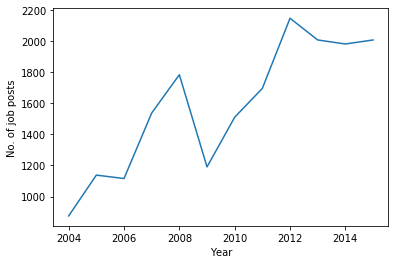

In [19]:
plt.plot('Year','Job Posts',data=per_year)
plt.xlabel('Year')
plt.ylabel('No. of job posts')
plt.show()

###  Job Per Month

In [20]:
per_month=pd.DataFrame(df.Month.value_counts().reset_index())
per_month['Job Posts']=per_month.Month
per_month['Month']=per_month['index']
per_month.drop('index',axis=1,inplace=True)
per_month.sort_values(by='Month',inplace=True)
per_month

,Month,Job Posts
11,1,1424
1,2,1665
0,3,1702
9,4,1466
7,5,1580
2,6,1662
6,7,1595
5,8,1613
3,9,1652
4,10,1637


###  Top 20 Job post each Year 20(04-15)

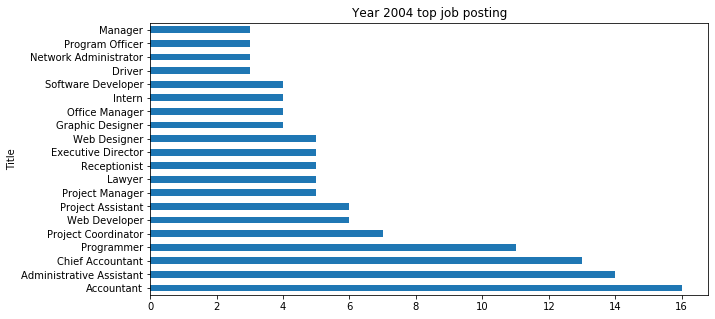

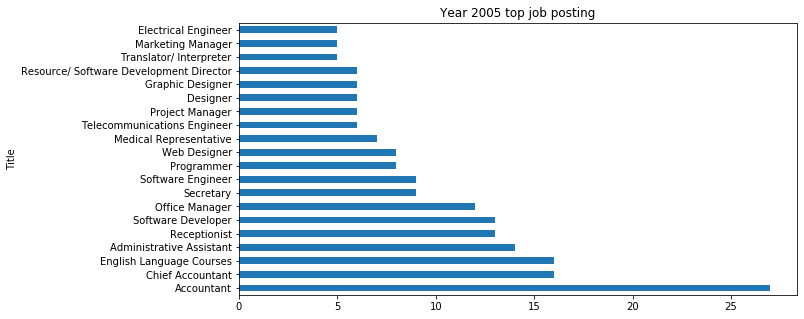

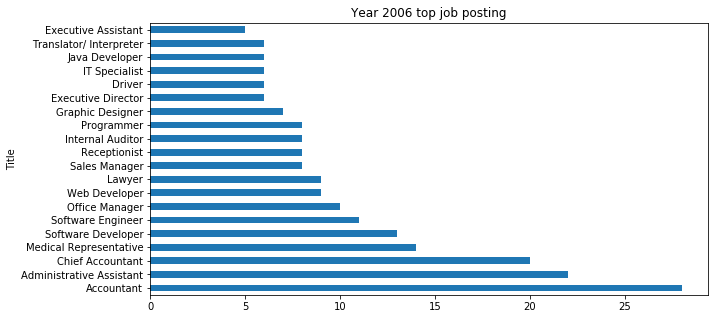

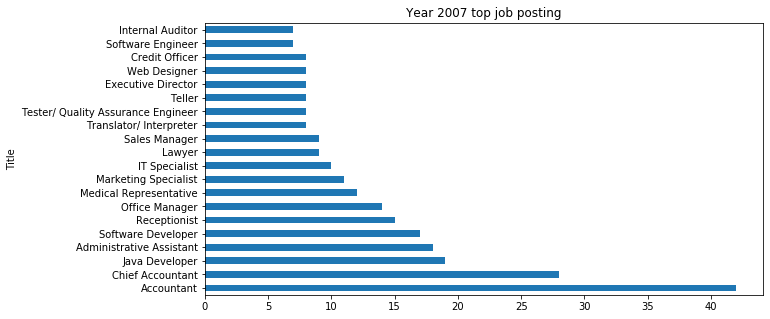

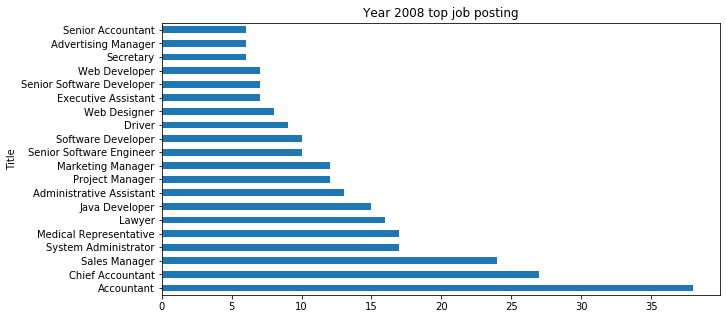

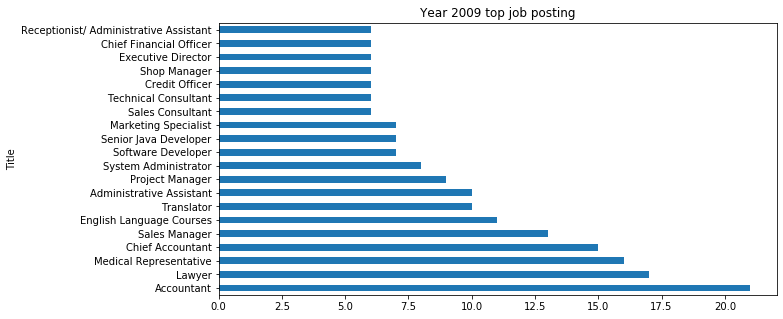

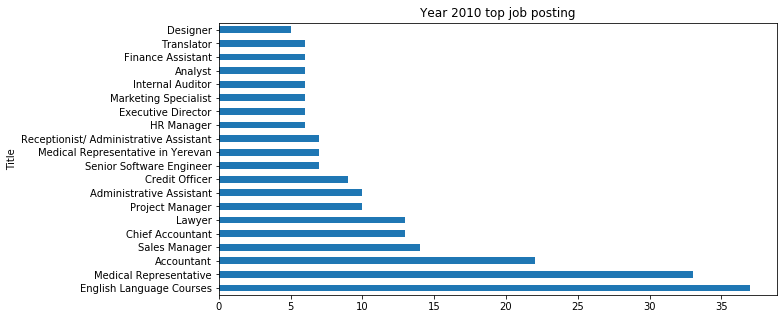

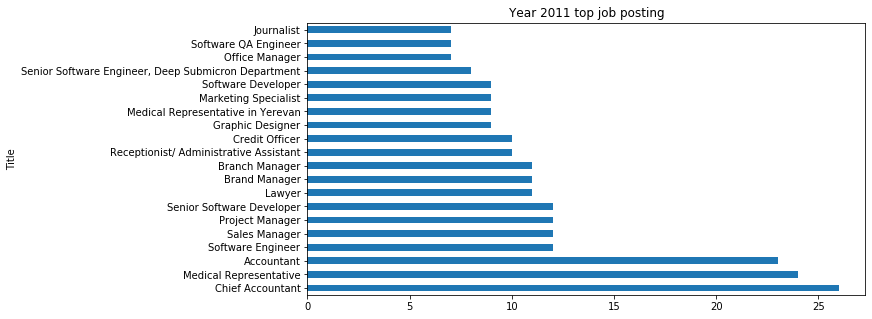

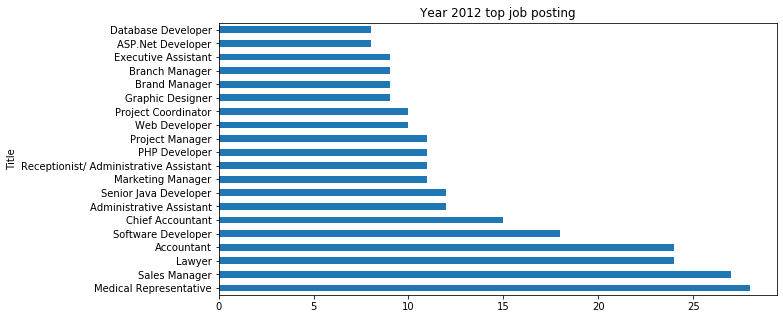

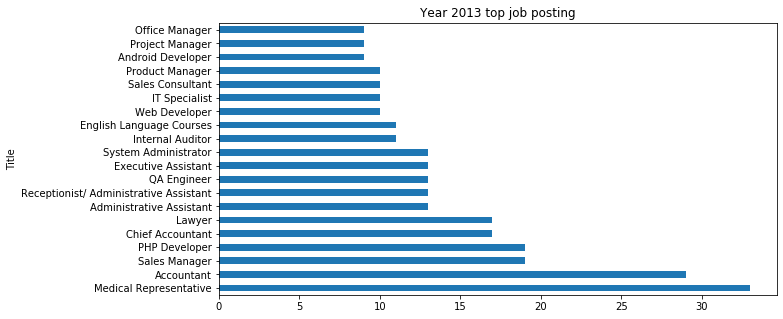

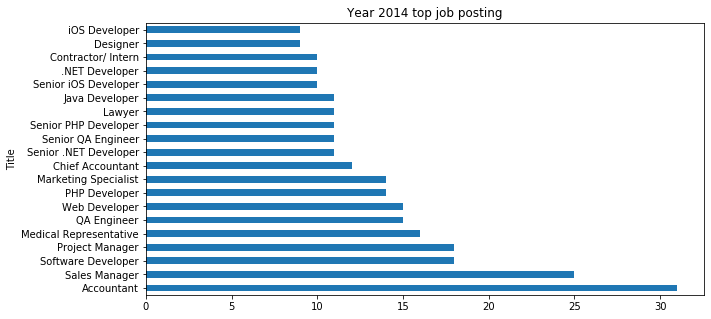

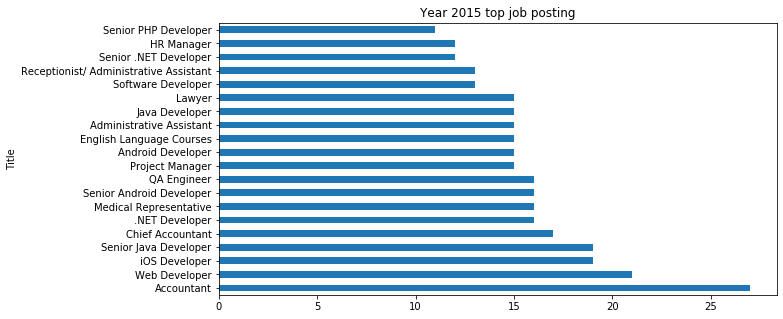

In [21]:
for i in range(2004, 2016):
    year=df[df.Year==i].groupby('Title').count().sort_values('jobpost',ascending=False).head(20)
    plt.figure(figsize=(10, 5))
    year.jobpost.plot('barh')
    plt.title('Year '+ str(i) + ' top job posting')
    plt.show()

In [22]:
important_features= ['jobpost','Title','Company' ,'JobRequirment','JobDescription',  'RequiredQual',  'AboutC',  'IT','Year']

In [30]:
df01= df.copy()

In [31]:
df01= df01[important_features]

In [198]:
df_temp= df.copy() ### Reference for future use.........

In [199]:
df_temp= df_temp[important_features]

In [306]:
df_temp.isna().sum().sum()


0

In [201]:
df_temp[['Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual', 'AboutC' ]]= df_temp[['Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual', 'AboutC' ]].fillna(df_temp[['Title','Company', 'JobRequirment', 'JobDescription', 'RequiredQual', 'AboutC' ]].mode().ix[0])

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [32]:
df01.isna().sum().sum()

13464

In [35]:
df01.Year.isna().sum()

0

In [36]:
df01[['Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual', 'AboutC' ]]= df01[['Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual', 'AboutC' ]].fillna(df01[['Title','Company', 'JobRequirment', 'JobDescription', 'RequiredQual', 'AboutC' ]].mode().ix[0])

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [37]:
df01.isna().sum().sum()

0

In [38]:
#df01.drop_duplicates(keep='first', inplace=True)

In [39]:
df01.head()

,jobpost,Title,Company,JobRequirment,JobDescription,RequiredQual,AboutC,IT,Year
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\nindividu...",Mentor Graphics Development Services CJSC is a...,False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),- Participate in application design;\n- Provid...,The incumbent will work under the direct super...,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,False,2004
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Caucasus Environmental NGO Network (CENN),- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,False,2004
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,Manoff Group,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",Mentor Graphics Development Services CJSC is a...,False,2004
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,Yerevan Brandy Company,- Rendering technical assistance to Database M...,The incumbent will work under the direct super...,- University degree; economical background is ...,Mentor Graphics Development Services CJSC is a...,True,2004


In [29]:
# df01['jobpost'] = df01['jobpost'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))  # remove emails
# df01['jobpost'] = df01['jobpost'].apply(lambda x: re.sub('\s+', ' ', x))  # remove newlines
# df01['jobpost'] = df01['jobpost'].apply(lambda x: re.sub("\'", "", x))  # remove single quotes
# re1 = '(www)'  # Word 1
# re2 = '(\\.)'  # Any Single Character 1
# re3 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 1
# re4 = '(\\.)'  # Any Single Character 2
# re5 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 2
# rg = re.compile(re1 + re2 + re3 + re4 + re5, re.IGNORECASE | re.DOTALL)
# df01['jobpost'] = df01['jobpost'].apply(lambda x: re.sub(rg, "", x))
# re1 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 1
# re2 = '(\\.)'  # Any Single Character 1
# re3 = '((?:[a-z][a-z0-9_]*))'  # Word 1
# rg = re.compile(re1 + re2 + re3, re.IGNORECASE | re.DOTALL)
# df01['jobpost'] = df01['jobpost'].apply(lambda x: re.sub(rg, "", x))
# df01.jobpost = df01.jobpost.apply(lambda x: re.sub('(\\d+)', "", x))  # remove numbers

In [40]:
for i in ['jobpost','JobRequirment','JobDescription',  'RequiredQual',  'AboutC']:
    df01[i] = df01[i].apply(lambda x: re.sub('\S*@\S*\s?', '', x))  # remove emails
    df01[i] = df01[i].apply(lambda x: re.sub('\s+', ' ', x))  # remove newlines
    df01[i] = df01[i].apply(lambda x: re.sub("\'", "", x))  # remove single quotes
    re1 = '(www)'  # Word 1
    re2 = '(\\.)'  # Any Single Character 1
    re3 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 1
    re4 = '(\\.)'  # Any Single Character 2
    re5 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 2
    rg = re.compile(re1 + re2 + re3 + re4 + re5, re.IGNORECASE | re.DOTALL)
    df01[i] = df01[i].apply(lambda x: re.sub(rg, "", x))
    re1 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 1
    re2 = '(\\.)'  # Any Single Character 1
    re3 = '((?:[a-z][a-z0-9_]*))'  # Word 1
    rg = re.compile(re1 + re2 + re3, re.IGNORECASE | re.DOTALL)
    df01[i] = df01[i].apply(lambda x: re.sub(rg, "", x))
    df01[i] = df01[i].apply(lambda x: re.sub('(\\d+)', "", x))  # remove numbers

In [41]:
df01['jobpost_token'] = df01.jobpost.map(word_tokenize)

In [42]:
df01.jobpost_token.head()

0    [AMERIA, Investment, Consulting, Company, JOB,...
1    [International, Research, &, Exchanges, Board,...
2    [Caucasus, Environmental, NGO, Network, (, CEN...
3    [Manoff, Group, JOB, TITLE, :, BCC, Specialist...
4    [Yerevan, Brandy, Company, JOB, TITLE, :, Soft...
Name: jobpost_token, dtype: object

In [43]:
df01['jobpost_len'] = df01.jobpost_token.apply(len)

Text(0.5, 1.0, 'Length of jobpost (for each of the rows), plotted')

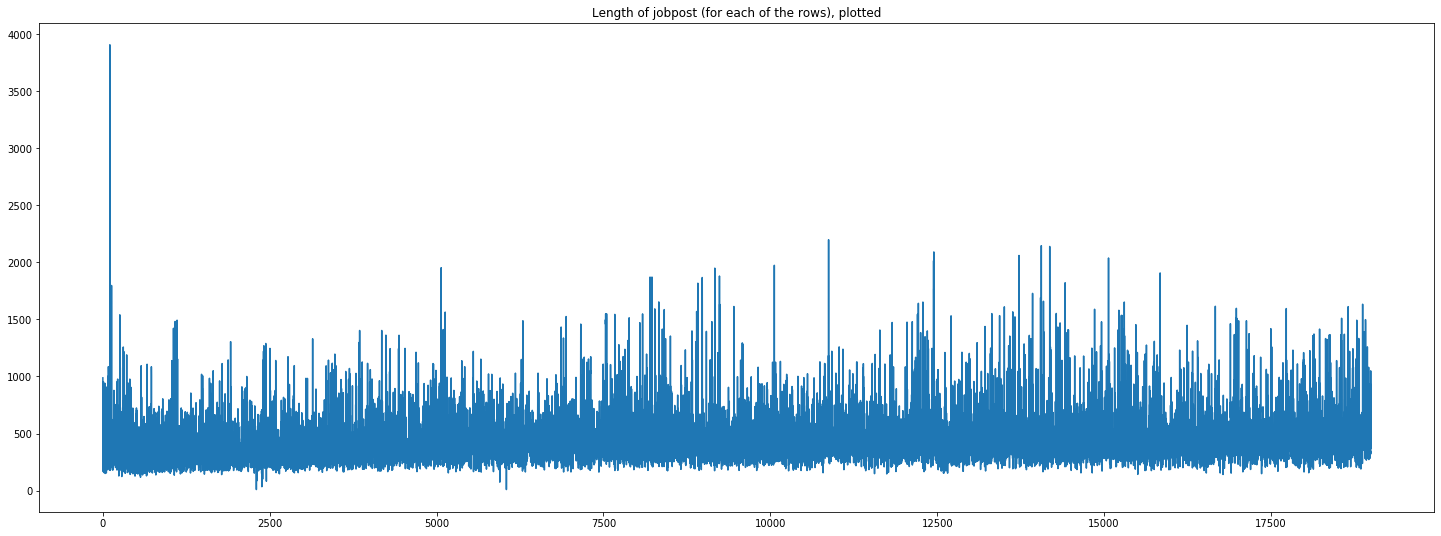

In [44]:
plt.figure(figsize=(25, 9))
plt.plot(df01.jobpost_len)
plt.title('Length of jobpost (for each of the rows), plotted')

In [45]:
def cleaning_tokens(tokens):
    tokens_no_punct = [t for t in tokens if t not in string.punctuation]
    tokens_no_punct = [t.lower() for t in tokens_no_punct]
    wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    stop.extend(['armenian','armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
                 'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company'])
    tokens_no_stop = [t for t in tokens_no_punct if t not in stop]
    tokens_lemetized = [wnl.lemmatize(t) for t in tokens_no_stop]
    cleaned_tokens = [t for t in tokens_lemetized if len(t) >= 3]
    return cleaned_tokens



In [46]:
def plotWC(tokens):
    cleaned_text = " ".join(tokens)
    print(cleaned_text)
    wc = WordCloud(background_color="white").generate(cleaned_text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    freq_dist = nltk.FreqDist(tokens) 
    freq_dist.plot(50)

['xalt', 'llc', 'graphic', 'designer', 'yerevan', 'description', 'graphic', 'designer', 'demand', 'proven', 'successful', 'experience', 'field', 'new', 'medium', 'design', 'communication', 'concept', 'created', 'since', 'completing', 'study', 'proving', 'popular', 'graphic', 'designer', 'responsible', 'every', 'graphical', 'development', 'software', 'website', 'general', 'user', 'interface', 'product', 'packaging', 'including', 'user', 'guide', 'documentation', 'assist', 'marketing', 'communication', 'team', 'develop', 'corporate', 'material', 'group', 'subsidiary', 'also', 'create', 'marketing', 'presentation', 'in-house', 'client', 'project', 'creative', 'innovative', 'great', 'capacity', 'implement', 'stylish', 'idea', 'open', 'new', 'trend', 'fine', 'art', 'extensive', 'knowledge', 'graphic', 'design', 'marketing', 'communication', 'tool', 'well', 'thorough', 'knowledge', 'adobe', 'photoshop', 'adobe', 'illustrator', 'least', 'year', 'experience', 'working', 'web', 'publishing', 'e

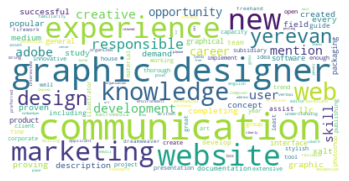

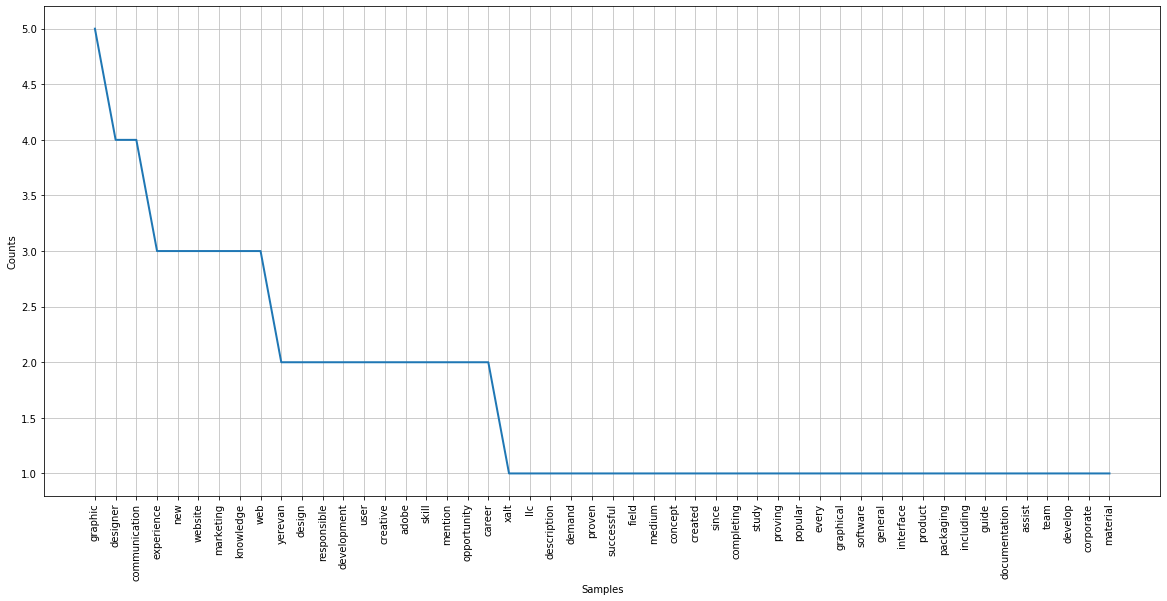

In [47]:
cleaned_tokens = cleaning_tokens((df01.iloc[19])['jobpost_token'])
print(cleaned_tokens)
plotWC(cleaned_tokens)

In [48]:
df01['jobpost_processed'] = df01.jobpost_token.apply(cleaning_tokens)

In [39]:
# bigram = gensim.models.Phrases(df01['jobpost_processed'], min_count=5, threshold=110)  # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[df01['jobpost_processed']], threshold=100)
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)


# def make_bigrams(texts):
#     return [bigram_mod[doc] for doc in texts]

# df01.jobpost_processed = make_bigrams(df01.jobpost_processed)

In [49]:
df02= df.copy()

In [50]:
df02= df02[important_features]

In [51]:
df02[['Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual', 'AboutC' ]]= df02[['Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual', 'AboutC' ]].fillna(df02[['Title','Company', 'JobRequirment', 'JobDescription', 'RequiredQual', 'AboutC' ]].mode().ix[0])

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [52]:
#df02.drop_duplicates(keep='first', inplace=True)

###  Model Building

In [53]:
df02=df02[['RequiredQual','IT']]

In [54]:
df02['RequiredQual'] = df02['RequiredQual'].astype(str)

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df02['noun_count'] = df02['RequiredQual'].apply(lambda x: check_pos_tag(x, 'noun'))
df02['verb_count'] = df02['RequiredQual'].apply(lambda x: check_pos_tag(x, 'verb'))
df02['adj_count']  = df02['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adj'))
df02['adv_count']  = df02['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adv'))
df02['pron_count'] = df02['RequiredQual'].apply(lambda x: check_pos_tag(x, 'pron')) 


In [57]:
### Sentiment Analysis 

In [55]:
df02['sentiment'] = df02["RequiredQual"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [56]:
df02.IT.value_counts()

False    15242
True      3759
Name: IT, dtype: int64

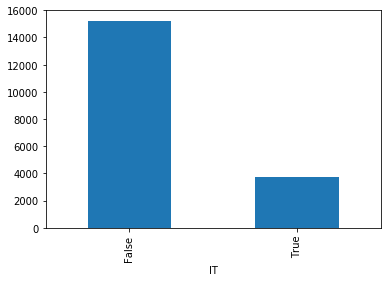

In [58]:
df02.groupby('IT')['RequiredQual'].count().plot('bar')
plt.show()

In [59]:
df02['IT'] = np.where(df02.IT==False,0,1)

In [70]:
# train features and labels 
y = df02['IT']
X = df02['RequiredQual']

# split the new DataFrame into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.2, random_state=123)

In [71]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [72]:
stop = set(nltk.corpus.stopwords.words('english'))

In [73]:
import string
def pre_process(text):
    
    text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    return(text)

In [74]:
train_X = train_X.apply(lambda x: clean_text(x))
test_X = test_X.apply(lambda x: clean_text(x))

In [75]:
train_X = train_X.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space

In [76]:
train_X = train_X.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))

In [77]:
train_X = train_X.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words

In [78]:
#train_X = train_X.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections

In [79]:
train_X = train_X.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [82]:
test_X = test_X.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space

In [83]:
test_X = test_X.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))

In [84]:
test_X = test_X.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words

In [85]:
#test_X = test_X.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections

In [86]:
test_X = test_X.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [87]:
# train_X=pre_process(train_X)
# test_X =pre_process(test_X)

In [88]:
#Train and test
count_vector = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(2, 3),  
                             encoding='latin-1',
                             max_df=0.9,min_df=0.001)
train_X_count = count_vector.fit_transform(train_X)

tfidf_transformer = TfidfTransformer()

train_X_tfidf = tfidf_transformer.fit_transform(train_X_count)

test_X_count = count_vector.transform(test_X)
test_X_tfidf = tfidf_transformer.transform(test_X_count)

In [ ]:
#doc_term_metrics=pd.DataFrame(train_X_tfidf.toarray(), columns=count_vector.get_feature_names())

In [89]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(2, 3),max_df=0.95,min_df=0.001)
tfidf_vect_ngram.fit(df02['RequiredQual'])
train_X_tfidf_ngram =  tfidf_vect_ngram.transform(train_X)
test_X_tfidf_ngram =  tfidf_vect_ngram.transform(test_X)

In [90]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(2,3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram_chars.fit(df02['RequiredQual'])
train_X_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_X) 
test_X_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(test_X)

C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [91]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=15, learning_method='batch', max_iter=50)
topics_X = lda_model.fit_transform(train_X_tfidf)
topic_word = lda_model.components_ 
vocab = count_vector.get_feature_names()

In [92]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['eager learn good oral complete task good oral written ability complete task ability complete flexible ability task timely manner complete task timely timely manner',
 'computer science good knowledge least year sql server work experience degree computer html cs english language degree computer science year experience',
 'related discipline information technology bachelor degree computer science english language skill degree computer degree computer science software development language skill science related discipline',
 'work experience within strict time frame within strict time strict time strict time frame work pressure pressure within strict ability work ability work pressure',
 'computer science advanced knowledge window server knowledge window knowledge network degree computer science degree computer active directory good knowledge tcp ip',
 'least year excellent knowledge knowledge armenian work experience university degree good knowledge english language year work year work 

In [93]:
frequency_words_word_stop= {}
for data in df02['RequiredQual']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_word_stop:
                count = frequency_words_word_stop[token]
                count = count + 1
                frequency_words_word_stop[token] = count
            else:
                frequency_words_word_stop[token] = 1

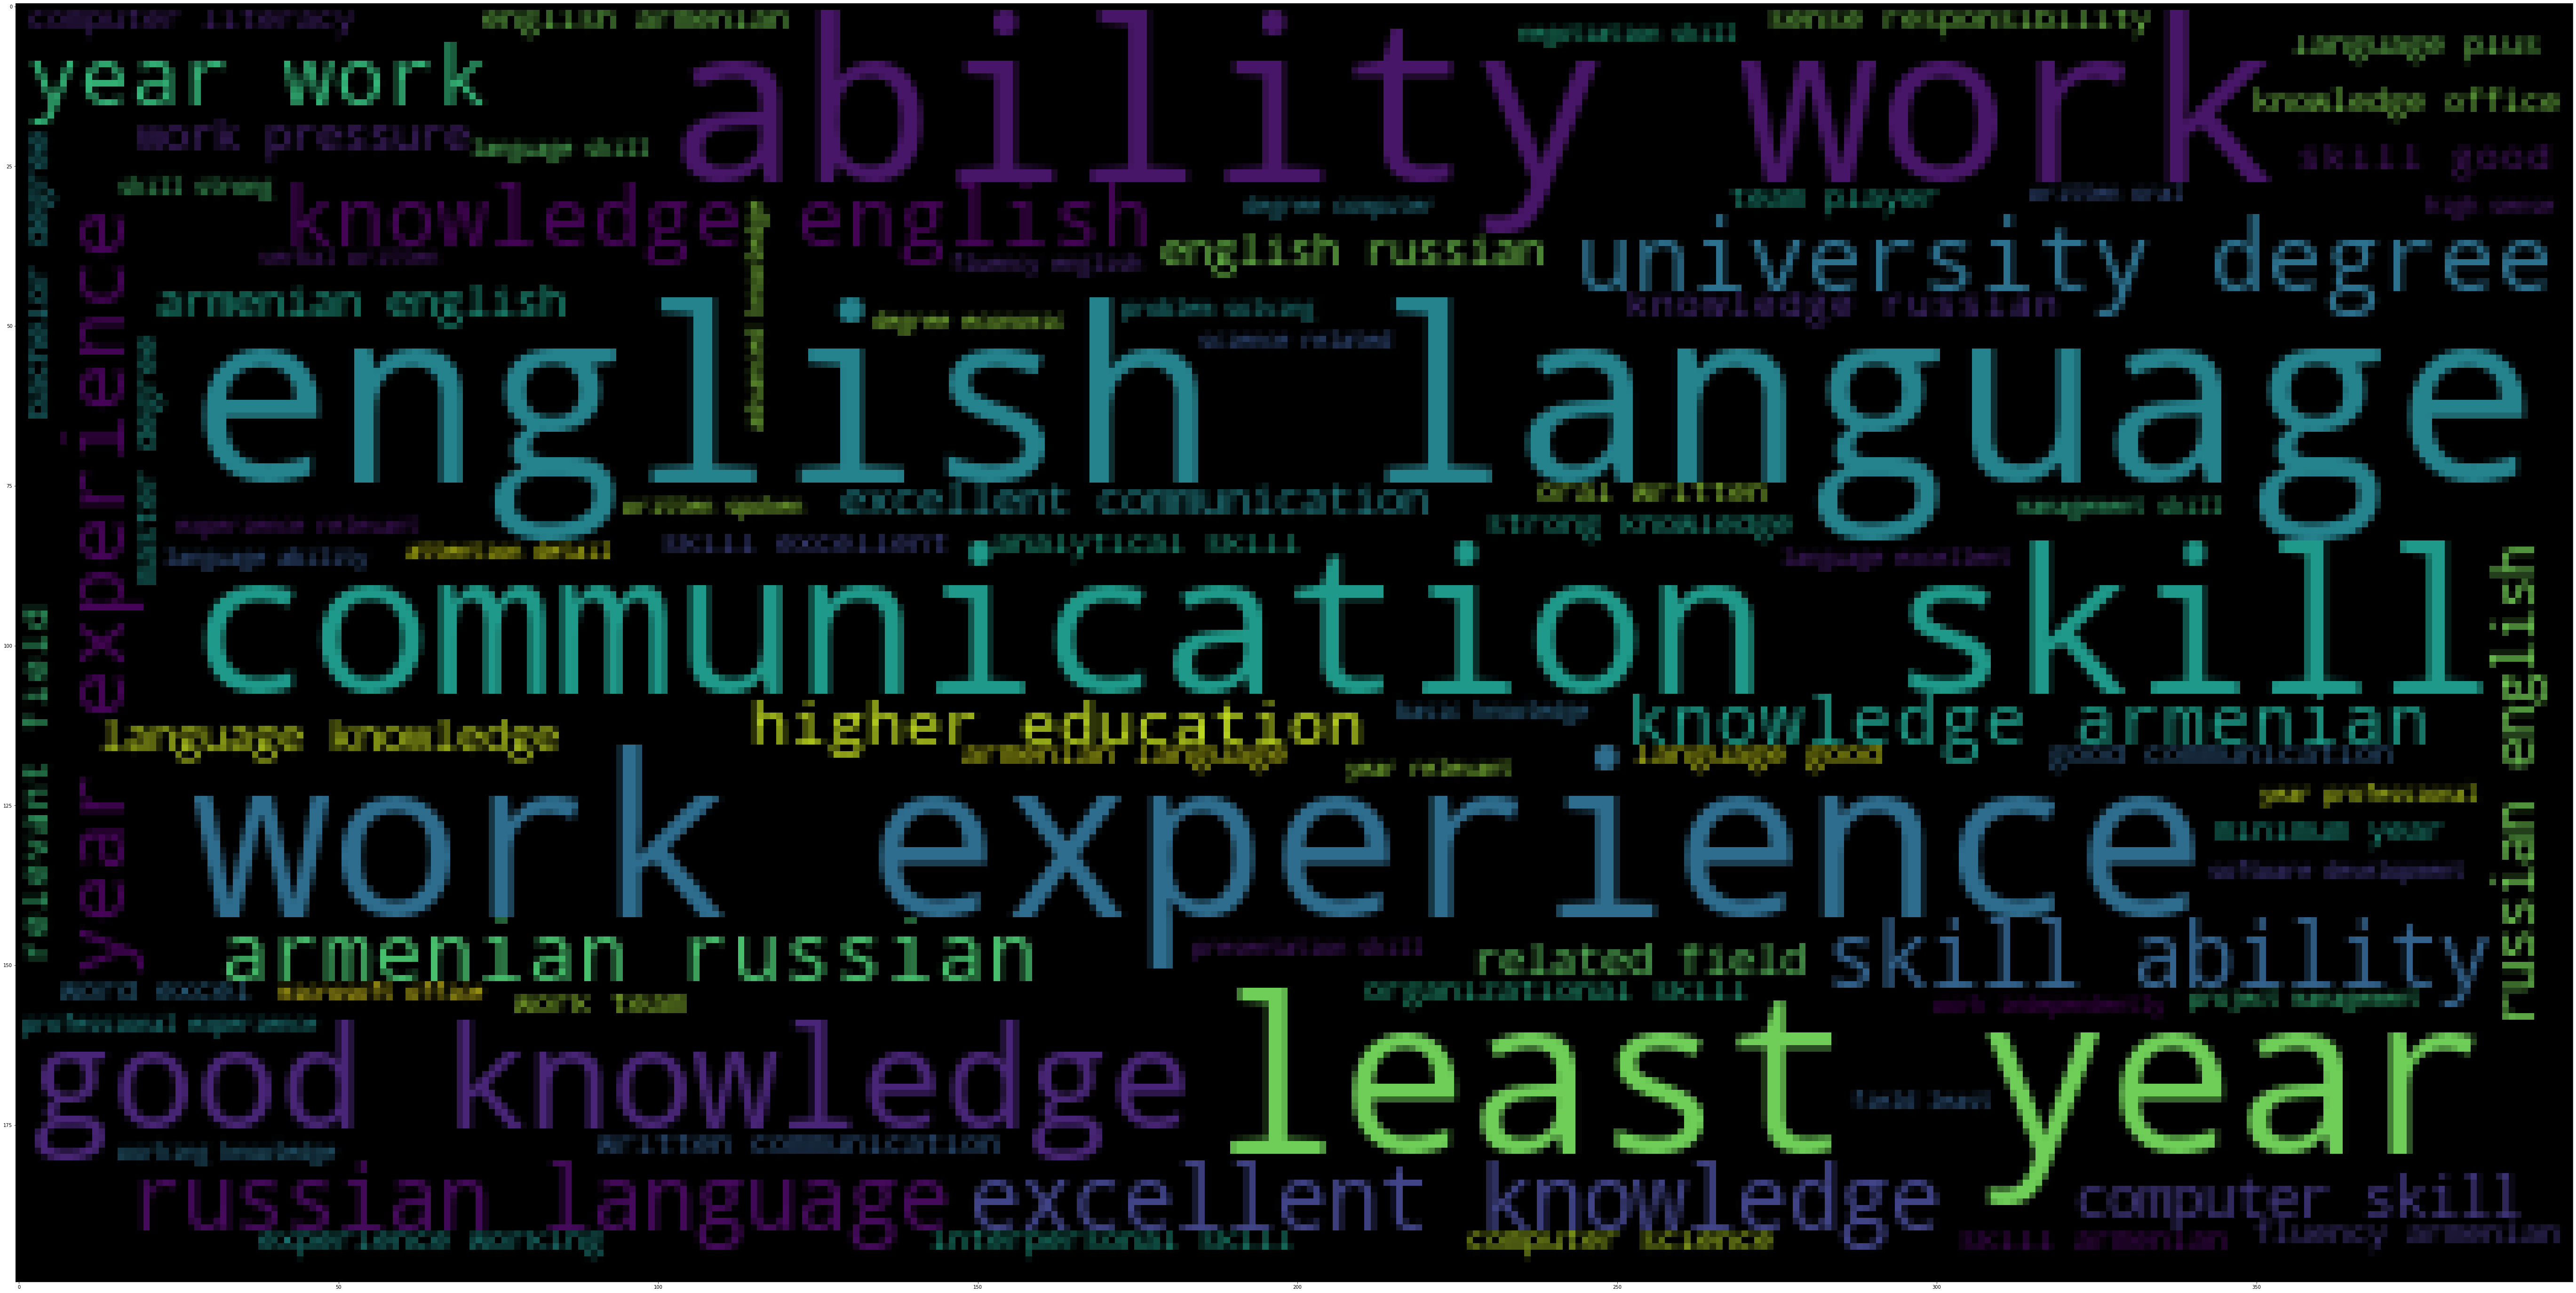

In [94]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(train_X.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [95]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    
    return metrics.accuracy_score(predictions, valid_y)

In [96]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1_count = train_model(LogisticRegression(), train_X_tfidf, train_y, test_X_tfidf, test_y)
print("LR  for L1, Count Vectors: ", accuracy_L1_count)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1_word = train_model(LogisticRegression(), train_X_count, train_y, test_X_count, test_y)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1_word)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1_ngrams = train_model(LogisticRegression(), train_X_tfidf_ngram, train_y, test_X_tfidf_ngram, test_y)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1_ngrams)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1_chars = train_model(LogisticRegression(), train_X_tfidf_ngram_chars, train_y, test_X_tfidf_ngram_chars, test_y)

print("LR for L1, CharLevel Vectors: ", accuracy_L1_chars)

LR  for L1, Count Vectors:  0.9213364903972638


C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR  for L1, WordLevel TF-IDF:  0.9334385687976848
LR  for L1, N-Gram Vectors:  0.9194948697711128
LR for L1, CharLevel Vectors:  0.9231781110234148


In [99]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1_svc_count = train_model(svm.LinearSVC(), train_X_tfidf, train_y, test_X_tfidf, test_y)
print("SVC  for L1, Count Vectors: ", accuracy_L1_svc_count)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1_svc_word = train_model(svm.LinearSVC(), train_X_count, train_y, test_X_count, test_y)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1_svc_word)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1_svc_ngram = train_model(svm.LinearSVC(), train_X_tfidf_ngram, train_y, test_X_tfidf_ngram, test_y)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1_svc_ngram)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1_svc_char = train_model(svm.LinearSVC(), train_X_tfidf_ngram_chars, train_y, test_X_tfidf_ngram_chars, test_y)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1_svc_char)

SVC  for L1, Count Vectors:  0.9339647461194422
SVC  for L1, WordLevel TF-IDF:  0.9260720862930808
SVC  for L1, N-Gram Vectors:  0.9297553275453828
SVC for L1, CharLevel Vectors:  0.9326493028150487


In [102]:
#Random Forest
# Random Forest on Count Vectors and TF-IDF
accuracy_L1_rf_count = train_model(RandomForestClassifier(), train_X_tfidf, train_y, test_X_tfidf, test_y)
print("LR  for L1, Count Vectors: ", accuracy_L1_rf_count)



# Random Forest on Word Level TF IDF Vectors
accuracy_L1_rf_word = train_model(RandomForestClassifier(), train_X_count, train_y, test_X_count, test_y)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1_rf_word)



# Random Forest on Ngram Level TF IDF Vectors
accuracy_L1_rf_ngram = train_model(RandomForestClassifier(), train_X_tfidf_ngram, train_y, test_X_tfidf_ngram, test_y)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1_rf_ngram)



# Random Forest on Character Level TF IDF Vectors
accuracy_L1_rf_char = train_model(RandomForestClassifier(), train_X_tfidf_ngram_chars, train_y, test_X_tfidf_ngram_chars, test_y)
print("LR for L1, CharLevel Vectors: ", accuracy_L1_rf_char)

LR  for L1, Count Vectors:  0.9368587213891081
LR  for L1, WordLevel TF-IDF:  0.9394896079978953
LR  for L1, N-Gram Vectors:  0.9339647461194422
LR for L1, CharLevel Vectors:  0.9381741646935017


In [103]:
#XGBoosting
# XGBoosting on Count Vectors and TF-IDF
accuracy_L1_XG_count = train_model(XGBClassifier(), train_X_tfidf, train_y, test_X_tfidf, test_y)
print("LR  for L1, Count Vectors: ", accuracy_L1_XG_count)



# XGBoosting on Word Level TF IDF Vectors
accuracy_L1_XG_word = train_model(XGBClassifier(), train_X_count, train_y, test_X_count, test_y)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1_XG_word)



# XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1_XG_ngram = train_model(XGBClassifier(), train_X_tfidf_ngram, train_y, test_X_tfidf_ngram, test_y)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1_XG_ngram)



# XGBoosting on Character Level TF IDF Vectors
accuracy_L1_XGchar = train_model(XGBClassifier(), train_X_tfidf_ngram_chars, train_y, test_X_tfidf_ngram_chars, test_y)
print("LR for L1, CharLevel Vectors: ", accuracy_L1_XGchar)

LR  for L1, Count Vectors:  0.9018679294922389
LR  for L1, WordLevel TF-IDF:  0.9002893975269666
LR  for L1, N-Gram Vectors:  0.8929229150223625
LR for L1, CharLevel Vectors:  0.923967377006051


In [104]:
# create a DataFrame that only contains the 5-star and 1-star reviews
df03 = df02[(df.IT==0)| (df02.IT==1)]

# define X and y
feature_cols = ['RequiredQual','sentiment']
X = df02[feature_cols]
y = df02.IT

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [105]:
# use CountVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.9,min_df=0.001, ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

X_train.drop('RequiredQual', axis=1).shape

(14250, 11266)
(4751, 11266)


(14250, 1)

In [106]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(14250, 10148)
(4751, 10148)


(14250, 1)

In [107]:

from scipy import sparse

In [108]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('RequiredQual', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('RequiredQual', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(4751, 10149)

In [109]:
# use Random Forest with text column only
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm, y_train)
y_pred_class = rmf.predict(X_test_dtm,)
acc_rmf=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf

0.9461166070300989

In [110]:
# use Random Forest with all features
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm_extra, y_train)
y_pred_class = rmf.predict(X_test_dtm_extra)
acc_rmf1=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf1

0.9465375710376763

In [114]:
# use logistic regression with all column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
acc_log1=metrics.accuracy_score(y_test, y_pred_class)
acc_log1

C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9284361187118502

In [115]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
acc_log=metrics.accuracy_score(y_test, y_pred_class)
acc_log

C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9303304567459483

In [112]:
# use Xtreme Boosting with text column only
xgb = XGBClassifier()
xgb.fit(X_train_dtm, y_train)
y_pred_class = xgb.predict(X_test_dtm)
acc_xgb=metrics.accuracy_score(y_test, y_pred_class)
acc_xgbb

0.9183329825299937

In [116]:
# use Xtreme Boosting with all column only
xgb = XGBClassifier()
xgb.fit(X_train_dtm_extra, y_train)
y_pred_class = xgb.predict(X_test_dtm_extra)
acc_xgb1=metrics.accuracy_score(y_test, y_pred_class)
acc_xgb1

0.9177015365186276

In [122]:
from sklearn import svm

In [120]:
# use SVM with texr tfeatures
svm = svm.LinearSVC()
svm.fit(X_train_dtm, y_train)
y_pred_class = svm.predict(X_test_dtm)
acc_svm=metrics.accuracy_score(y_test, y_pred_class)
acc_svm

0.9286466007156388

In [123]:
# use SVM with all features
svm1 = svm.LinearSVC()
svm1.fit(X_train_dtm_extra, y_train)
y_pred_class = svm1.predict(X_test_dtm_extra)
acc_svm1=metrics.accuracy_score(y_test, y_pred_class)
acc_svm1

0.9282256367080615

Text(0.5, 15.0, 'Predicted label')

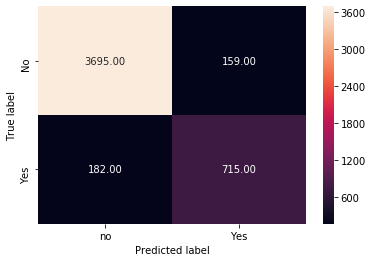

In [124]:
cm = metrics.confusion_matrix( y_test, y_pred_class)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [131]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'XGBoosting', 'sm'],'Score': [acc_log, acc_rmf, acc_xgb, acc_svm]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.946117
0,Logistic Regression,0.930330
3,sm,0.928647
2,XGBoosting,0.918333


In [132]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'XGBoosting','svm1'],
    
    'Score': [acc_log1,acc_rmf1,acc_xgb1,acc_svm1]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.946538
0,Logistic Regression,0.928436
3,svm1,0.928226
2,XGBoosting,0.917702


###  Random Forest showing best accuracy

In [378]:
# output files predictions with random forest

In [374]:
data_output_all_features= pd.DataFrame({'Predicted Y': y_pred_class, 'Test Y': y_test})
data_output_all_features.to_csv('Output with all features ', index=False)

In [377]:
data_output_text_features= pd.DataFrame({'Predicted Y': y_pred_class, 'Test Y': y_test})
data_output_text_features.to_csv('Output with text features ', index=False)

### Unsupervised Learning

In [134]:
# Data Selection
df04 = df[['RequiredQual']]

In [135]:
df04['RequiredQual'] = df04['RequiredQual'].astype(str)

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
from nltk.util import ngrams

In [137]:
def remove_punctuations(text):
    text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)                # Remove punctuations
    text=text.lower()                                       # Convert text to lower
    return(text)

df04['RequiredQual']=df04['RequiredQual'].apply( lambda x: remove_punctuations(x))
df04['RequiredQual'].head(4)

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    to perform this job successfully, an\nindividu...
1    - bachelor's degree; master's is preferred;\n-...
2    - degree in environmentally related field, or ...
3    - advanced degree in public health, social sci...
Name: RequiredQual, dtype: object

In [138]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.1, max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')
vectorizer.fit(df04['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=0.1, ngram_range=(1, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [139]:
X_train = vectorizer.transform(df04['RequiredQual'])
vocab = vectorizer.get_feature_names()

In [140]:
vocab[:10]

['ability',
 'ability work',
 'ability work pressure',
 'accounting',
 'advanced',
 'analytical',
 'armenian',
 'armenian english',
 'armenian russian',
 'armenian russian english']

In [141]:
# get the tf-idf table 
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(df04['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=None,
                min_df=0.05, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [142]:
# Create a training data
X_train = vectorizer.transform(df04['RequiredQual'])

In [143]:
# Use SVD to reduce dimensions
svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X_train)

In [144]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 99%


In [145]:
range_n_clusters = list (range(4,11))

In [146]:
for n_cluster in range_n_clusters:
    clusterer = KMeans(n_clusters=n_cluster)
    preds = clusterer.fit_predict(X_lsa)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_lsa, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(n_cluster, score))

For n_clusters = 4, silhouette score is 0.0328328910417898
For n_clusters = 5, silhouette score is 0.0328717682219229
For n_clusters = 6, silhouette score is 0.03249488309501585
For n_clusters = 7, silhouette score is 0.03397645873550613
For n_clusters = 8, silhouette score is 0.03393361968440725
For n_clusters = 9, silhouette score is 0.031594877130950515
For n_clusters = 10, silhouette score is 0.03349718858274018


In [148]:
# we create a kmeans model
model = KMeans(n_clusters=7, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)

In [149]:
# apply the model on this prepared data
res = model.fit(X_train)
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=7, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [150]:
# Getting the vocalbulary as well as cluster centers
# Firstly, set of words from the tf-idf itself
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)

In [151]:
# Then, the cluster centers from the model fit that we stored on res
cluster_centers = np.array(res.cluster_centers_)

In [152]:
x=np.array((0.1,10,0.05,1.5))
print(x)
print(x.argsort())
res.cluster_centers_[0].argsort()

[ 0.1  10.    0.05  1.5 ]
[2 0 3 1]


array([172,  68, 134, 168, 171,  90,  91, 133,  99, 200, 201,  70,  74,
        39, 158,  16, 112, 184,   2, 163, 111,  30, 179,  76, 177, 164,
        80, 157, 103, 166, 130,  45,  97, 167,  82, 151, 129,  29,  84,
       165,   8,  14, 185, 148, 174, 118,  18, 113,  12, 128,  60,  50,
        92, 159,  79, 116, 123, 181, 193, 192,  65, 183, 138, 132,  26,
       202,  28,   7, 122,  86,  69, 117, 175,  93, 150, 197,  19, 115,
       110,  33,   9,   1, 186, 105,  32, 140, 156,  62,   6,  13,  44,
       154, 120,  72, 119, 188,  95, 160,  58,  59,  42, 194,  46, 108,
       142, 204,  27,  23, 152, 196, 195,  51,  78,  81,  48, 169,  75,
       206,  87,  57, 176, 153,  73, 104,  34, 170,  55,  67,  22, 189,
        36,  20, 143,  15, 180,  21,  37, 109,  89, 155,  98, 114,  17,
        47,  25, 100, 141,  96, 145,  54,  38, 161, 149, 137, 126, 125,
        71,   4, 173,  77, 102, 139, 178,  10, 121, 205, 187, 210,  11,
         3, 182, 211,  63, 101, 136,  49,  66, 127,  94,   0,  5

In [153]:
# sorting the cluster centers
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [154]:
# get top 10 words from that cluster
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
    print(words)

{'language', 'relevant', 'work experience', 'english language', 'english', 'years', 'knowledge', 'degree', 'experience', 'work'}
{'ability', 'skills', 'english language', 'knowledge', 'web', 'degree', 'programming', 'design', 'language', 'software', 'relevant', 'good', 'work experience', 'english', 'years', 'development', 'experience', 'work'}
{'ability', 'skills', 'english language', 'knowledge', 'web', 'degree', 'programming', 'design', 'business', 'language', 'software', 'excellent', 'international', 'relevant', 'good', 'strong', 'work experience', 'english', 'years', 'management', 'development', 'experience', 'work'}
{'skills ability', 'ability work', 'ability', 'skills', 'english language', 'work pressure', 'knowledge', 'web', 'degree', 'programming', 'design', 'business', 'language', 'software', 'excellent', 'international', 'relevant', 'good', 'strong', 'work experience', 'english', 'years', 'pressure', 'management', 'development', 'experience', 'work'}
{'skills ability', 'abili

In [155]:
words=list(words)

In [156]:
#add top words to train set
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [157]:
#train_set[,]
df04.head()

,RequiredQual
0,"to perform this job successfully, an\nindividu..."
1,- bachelor's degree; master's is preferred;\n-...
2,"- degree in environmentally related field, or ..."
3,"- advanced degree in public health, social sci..."
4,- university degree; economical background is ...


In [158]:
# how many observations are in each cluster

df04['cluster'] = model.labels_
df04.groupby('cluster').count()

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RequiredQual
cluster,
0,2225
1,3658
2,3066
3,3115
4,2896
5,1434
6,2607


In [380]:
df04.to_excel('Clustered Dataframe Output.xlsx')

In [159]:
df05= df.copy()

In [160]:
df05['AboutC']=df05['AboutC'].fillna(df05['AboutC'].mode().ix[0])

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [161]:
df05['AboutC'].head()

0    Mentor Graphics Development Services CJSC is a...
1    The International Research & Exchanges Board (...
2    The Caucasus Environmental NGO Network is a\nn...
3    Mentor Graphics Development Services CJSC is a...
4    Mentor Graphics Development Services CJSC is a...
Name: AboutC, dtype: object

In [176]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher

In [180]:
nlp = spacy.load('en')
matcher = Matcher(nlp.vocab)

In [181]:
def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [182]:
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

In [183]:
matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [185]:
matched_sents=[]
for t in df05.AboutC:
    if pd.notnull(t) and t != 'NaN':
        t = re.sub(r'\s+', ' ', t)
        doc = nlp(t)
        matches = matcher(doc)
        token_set = []
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # get string representation
            span = doc[start:end]  # the matched span
            token_set.append(span.text)    
        matched_sents.append(token_set)

In [186]:
flat_list = []
for row in matched_sents:
    for token in row:
        flat_list.append(token)

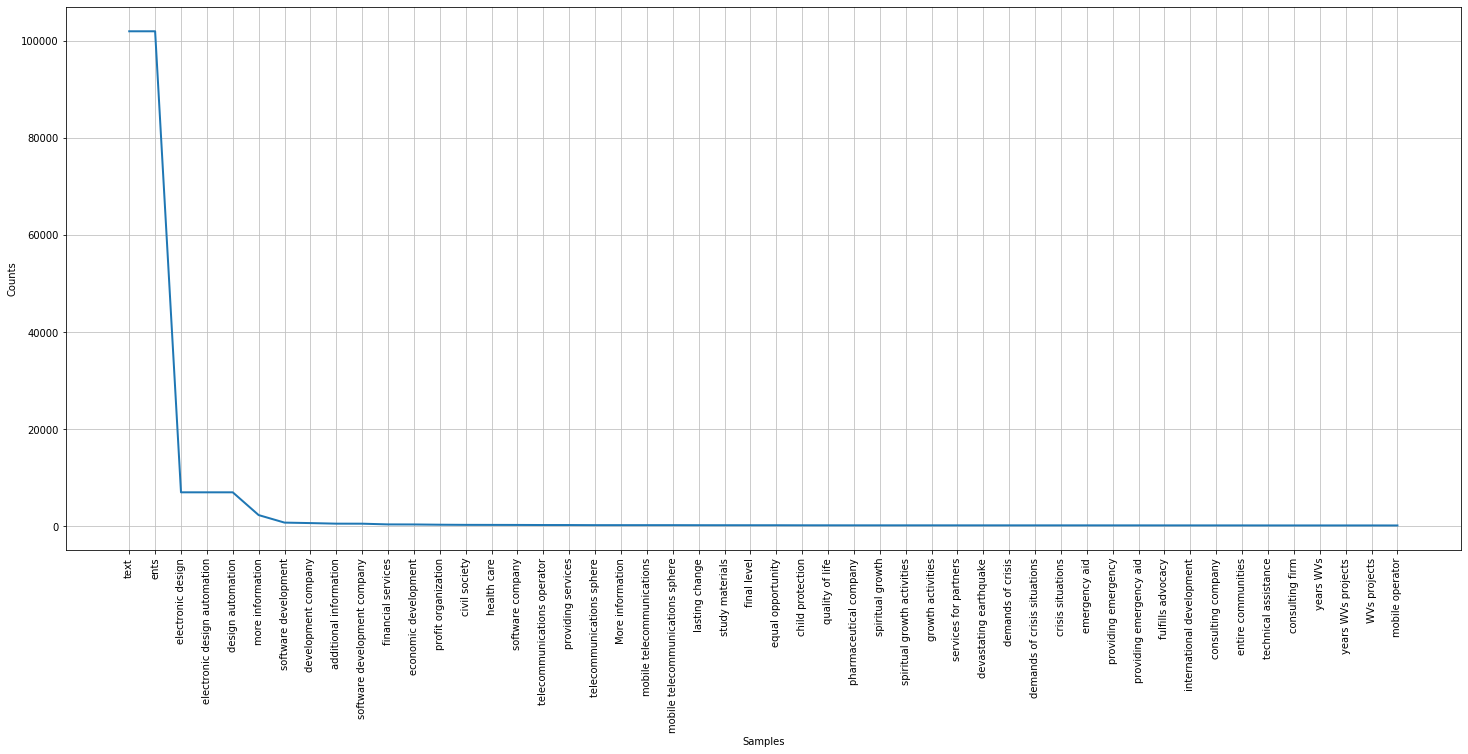

In [187]:
plt.figure(figsize=(25, 10))
fd = nltk.FreqDist(flat_list)  # case sensitive!
fd.most_common(50)
fd.plot(50)
plt.show()

In [205]:
#df[['jobpost','Title','JobRequirment','JobDescription','RequiredQual']].head(1)

In [204]:
#df06.head(1)

In [203]:
#df06.JobDescription

In [310]:
df07= df01.copy()

In [311]:
#df06=df_temp[['jobpost','Title','JobRequirment','JobDescription','RequiredQual']]
df06=df07[['jobpost','Title','JobRequirment','JobDescription','RequiredQual']]

In [312]:
df06['JobDescription_token'] = df_temp['JobDescription'].map(word_tokenize)
df06['RequiredQual_token'] = df_temp['RequiredQual'].map(word_tokenize)
df06['JobRequirment_token'] = df_temp['JobRequirment'].map(word_tokenize)

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [313]:
tfidf_model = TfidfVectorizer()
Title_tfidf = tfidf_model.fit_transform(df06['Title'])
JobDescription_tfidf = tfidf_model.fit_transform(df06['JobDescription'])
RequiredQual_tfidf = tfidf_model.fit_transform(df06['RequiredQual'])
JobRequirment_tfidf = tfidf_model.fit_transform(df06['JobRequirment'])

In [314]:
def find_similar_jobs_tfidf(index, top_n = 5):
    Title_tfidf_cosine = cosine_similarity(Title_tfidf[index:index+1], Title_tfidf).flatten()
    JobDescription_tfidf_cosine = cosine_similarity(JobDescription_tfidf[index:index+1], JobDescription_tfidf).flatten()
    RequiredQual_tfidf_cosine = cosine_similarity(RequiredQual_tfidf[index:index+1], RequiredQual_tfidf).flatten()
    JobRequirment_tfidf_cosine = cosine_similarity(JobRequirment_tfidf[index:index+1], JobRequirment_tfidf).flatten()

    average_cosine = (Title_tfidf_cosine +JobDescription_tfidf_cosine+RequiredQual_tfidf_cosine+JobRequirment_tfidf_cosine)/4.0
    related_docs_indices = [i for i in average_cosine.argsort()[::-1] if i != index]
    return [(index, average_cosine[index]) for index in related_docs_indices][0:top_n]

In [316]:
df06.iloc[0]

jobpost                 AMERIA Investment Consulting Company JOB TITLE...
Title                                             Chief Financial Officer
JobRequirment           - Supervises financial management and administ...
JobDescription          AMERIA Investment Consulting Company is seekin...
RequiredQual            To perform this job successfully, an individua...
JobDescription_token    [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token      [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token     [-, Supervises, financial, management, and, ad...
Name: 0, dtype: object

In [317]:
for index, score in find_similar_jobs_tfidf(0):
    print(df06.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Organization for Implementation of North-South...
Title                                             Chief Financial Officer
JobRequirment           Financial management of the NSRCIP T & T proje...
JobDescription          The Chief Financial Officer (CFO) will support...
RequiredQual            - Degree in Accounting, Finance, Business, Law...
JobDescription_token    [The, Chief, Financial, Officer, (, CFO, ), wi...
RequiredQual_token      [-, Degree, in, Accounting, ,, Finance, ,, Bus...
JobRequirment_token     [Financial, management, of, the, NSRCIP, T1, &...
Name: 12368, dtype: object
SIMILARITY SCORE:  0.4991805750711636
jobpost                 River Island TITLE: Chief Financial Officer LO...
Title                                             Chief Financial Officer
JobRequirment           - Develop tools and systems to provide critica...
JobDescription          River Island is seeking a Chief Financial Offi...
RequiredQual            - Masters degree in Man

In [318]:
df06.iloc[1]

jobpost                 International Research & Exchanges Board (IREX...
Title                   Full-time Community Connections Intern (paid i...
JobRequirment           - Participate in application design; - Provide...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Bachelors Degree; Masters is preferred; - Ex...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token     [-, Participate, in, application, design, ;, -...
Name: 1, dtype: object

In [319]:
for index, score in find_similar_jobs_tfidf(1):
    print(df06.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 International Research & Exchanges Board (IREX...
Title                    Non-paid part or full time Administrative Intern
JobRequirment           - Participate in application design; - Provide...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Excellent communication skills; - Good oral ...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Excellent, communication, skills, ;, -, Go...
JobRequirment_token     [-, Participate, in, application, design, ;, -...
Name: 11, dtype: object
SIMILARITY SCORE:  0.68003032815427
jobpost                 Military Institute MoD RA JOB TITLE: IT Teache...
Title                                             IT Teacher  (full time)
JobRequirment           - Participate in application design; - Provide...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Degree in Computer Science

In [320]:
df06.iloc[2]

jobpost                 Caucasus Environmental NGO Network (CENN) JOB ...
Title                                                 Country Coordinator
JobRequirment           - Working with the Country Director to provide...
JobDescription          Public outreach and strengthening of a growing...
RequiredQual            - Degree in environmentally related field, or ...
JobDescription_token    [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token      [-, Degree, in, environmentally, related, fiel...
JobRequirment_token     [-, Working, with, the, Country, Director, to,...
Name: 2, dtype: object

In [321]:
for index, score in find_similar_jobs_tfidf(2):
    print(df06.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Caucasus Environmental NGO Network TITLE: Coun...
Title                                       Country Coordinator - Armenia
JobRequirment           - Write first hand articles, conduct interview...
JobDescription          CENN - Caucasus Environmental NGO Network - is...
RequiredQual            . Education: University education in environme...
JobDescription_token    [CENN, -, Caucasus, Environmental, NGO, Networ...
RequiredQual_token      [1, ., Education, :, University, education, in...
JobRequirment_token     [-, Write, first, hand, articles, ,, conduct, ...
Name: 404, dtype: object
SIMILARITY SCORE:  0.4320615350538218
jobpost                 Veya Ltd. TITLE: Country Coordinator TERM: Ful...
Title                                                 Country Coordinator
JobRequirment           - Negotiate with potential customers; - Lobby ...
JobDescription          Veya Ltd. is looking for a qualified Country C...
RequiredQual            - At least  years of expe

In [219]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher


In [322]:
nlp = spacy.load('C:/Users/Krn/Anaconda3/Lib/site-packages/en_core_web_lg/en_core_web_lg-2.2.0')

In [323]:
# Original text - Title
doc1 = nlp(df06.iloc[0]['Title'])
doc2 = nlp(df06.iloc[2]['Title'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
Chief Financial Officer 

DOC2:
 Country Coordinator 

 0.5373299460395636


In [324]:
# Original text - RequiredQual
doc1 = nlp(df06.iloc[0]['RequiredQual'])
doc2 = nlp(df06.iloc[2]['RequiredQual'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully, an individual must be able to perform each essential duty satisfactorily. The requirements listed below are representative of the knowledge, skill, and/or ability required. Knowledge of: - Generally accepted accounting principles; - Local accounting standards and legislation; - State reporting requirements pertaining to accounting; - Principles and practices of financial management and budgeting; - Principles and practices of financial systems design and analysis; - Principles and practices of contract management, records management, and risk management; - Principles and practices of management and supervision; - Principles and practices of information systems management. Ability to: - Apply sound fiscal and administrative practices to the companys activities; - Plan, organize and supervise the work of subordinate employees, including training them, assigning and evaluating their work, and providing job performance feedback; - Critically analyze 

In [326]:
# removing stopwords and punctuations
doc1 = nlp(' '.join(df06.iloc[0]['RequiredQual_token']))
doc2 = nlp(' '.join(df06.iloc[2]['RequiredQual_token']))
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully , an individual must be able to perform each essential duty satisfactorily . The requirements listed below are representative of the knowledge , skill , and/or ability required . Knowledge of : - Generally accepted accounting principles ; - Local accounting standards and legislation ; - State reporting requirements pertaining to accounting ; - Principles and practices of financial management and budgeting ; - Principles and practices of financial systems design and analysis ; - Principles and practices of contract management , records management , and risk management ; - Principles and practices of management and supervision ; - Principles and practices of information systems management . Ability to : - Apply sound fiscal and administrative practices to the company's activities ; - Plan , organize and supervise the work of subordinate employees , including training them , assigning and evaluating their work , and providing job performance feedback

In [327]:
matcher = Matcher(nlp.vocab)

In [328]:
def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [329]:
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

In [330]:
matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [331]:
# RequiredQual
for job1_idx in range(df06.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', df06.iloc[job1_idx]['RequiredQual'])
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df06.set_value(job1_idx, 'RequiredQual_keywords', " ".join(keywords))

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\Krn\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Krn\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [332]:
# JobDescription
for job1_idx in range(df06.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df06.iloc[job1_idx]['JobDescription']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df06.set_value(job1_idx, 'JobDescription_keywords', " ".join(keywords))

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [333]:
# JobRequirment
for job1_idx in range(df06.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df06.iloc[job1_idx]['JobRequirment']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df06.set_value(job1_idx, 'JobRequirment_keywords', " ".join(keywords))

C:\Users\Krn\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [360]:
df_job_sim_dissim = pd.DataFrame(columns=['index', 'similar-job', 'dissimilar-score'])

In [361]:
df_job_sim_dissim

,index,similar-job,dissimilar-score


In [255]:
#!pip install textdistance

In [362]:
#foo

In [363]:
# foo= df06.iloc[0]['Title']
# bar= df06.iloc[174]['Title']
# foo_bar= textdistance.jaro_winkler(foo, bar)

# foo_bar

In [355]:
# foo= nlp(df06.iloc[0]['Title'])
# foo

Chief Financial Officer

In [356]:
# bar= nlp(df06.iloc[175]['Title'])
# bar

Secretary/ Referent

In [364]:
# foo.similarity(bar)


In [365]:
df06.shape

(19001, 11)

In [366]:
for job1_idx in range(3):  # rows
    for job2_idx in range(1000):
        
        doc1 = nlp(df06.iloc[job1_idx]['Title'])
        doc2 = nlp(df06.iloc[job2_idx]['Title'])
        try:
            title_similarity = doc1.similarity(doc2)
            print(job1_idx, job2_idx)
        except IndexError:  
            pass
            
        doc1 = nlp(df06.iloc[job1_idx]['JobDescription_keywords'])
        doc2 = nlp(df06.iloc[job2_idx]['JobDescription_keywords'])
        try: 
            jd_similarity = doc1.similarity(doc2)
            print(job1_idx, job2_idx)
        except IndexError: 
            pass
        
        doc1 = nlp(df06.iloc[job1_idx]['JobRequirment_keywords'])
        doc2 = nlp(df06.iloc[job2_idx]['JobRequirment_keywords'])
        try:
            jr_similarity = doc1.similarity(doc2)
            print(job1_idx, job2_idx)
            
        except IndexError:
            pass
        doc1 = nlp(df06.iloc[job1_idx]['RequiredQual_keywords'])
        doc2 = nlp(df06.iloc[job2_idx]['RequiredQual_keywords'])
        try :
            rq_similarity = doc1.similarity(doc2)
            print(job1_idx, job2_idx)
            
        except IndexError: 
            pass
            
        averaged_score = (title_similarity + jd_similarity + jr_similarity + rq_similarity) / 4.0
        df_job_sim_dissim = df_job_sim_dissim.append({'index': job1_idx, 'similar-job': job2_idx, 'dissimilar-score': (1-averaged_score)},ignore_index=True)
        print(job1_idx, job2_idx)

0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 2
0 2
0 2
0 2
0 2
0 3
0 3
0 3
0 3
0 3
0 4
0 4
0 4
0 4
0 4
0 5
0 5
0 5
0 5
0 5
0 6
0 6
0 6
0 6
0 6
0 7
0 7
0 7
0 7
0 7
0 8
0 8
0 8
0 8
0 8
0 9
0 9
0 9
0 9
0 9
0 10
0 10
0 10
0 10
0 10
0 11
0 11
0 11
0 11
0 11
0 12
0 12
0 12
0 12
0 12
0 13
0 13
0 13
0 13
0 13
0 14
0 14
0 14
0 14
0 14
0 15
0 15
0 15
0 15
0 15
0 16
0 16
0 16
0 16
0 16
0 17
0 17
0 17
0 17
0 17
0 18
0 18
0 18
0 18
0 18
0 19
0 19
0 19
0 19
0 19
0 20
0 20
0 20
0 20
0 20
0 21
0 21
0 21
0 21
0 21
0 22
0 22
0 22
0 22
0 22
0 23
0 23
0 23
0 23
0 23
0 24
0 24
0 24
0 24
0 24
0 25
0 25
0 25
0 25
0 25
0 26
0 26
0 26
0 26
0 26
0 27
0 27
0 27
0 27
0 27
0 28
0 28
0 28
0 28
0 28
0 29
0 29
0 29
0 29
0 29
0 30
0 30
0 30
0 30
0 30
0 31
0 31
0 31
0 31
0 31
0 32
0 32
0 32
0 32
0 32
0 33
0 33
0 33
0 33
0 33
0 34
0 34
0 34
0 34
0 34
0 35
0 35
0 35
0 35
0 35
0 36
0 36
0 36
0 36
0 36
0 37
0 37
0 37
0 37
0 37
0 38
0 38
0 38
0 38
0 38
0 39
0 39
0 39
0 39
0 39
0 40
0 40
0 40
0 40
0 40
0 41
0 41
0 41
0 41
0 41


0 297
0 298
0 298
0 298
0 298
0 299
0 299
0 299
0 299
0 300
0 300
0 300
0 300
0 300
0 301
0 301
0 301
0 301
0 301
0 302
0 302
0 302
0 302
0 302
0 303
0 303
0 303
0 303
0 303
0 304
0 304
0 304
0 304
0 304
0 305
0 305
0 305
0 305
0 305
0 306
0 306
0 306
0 306
0 306
0 307
0 307
0 307
0 307
0 307
0 308
0 308
0 308
0 308
0 308
0 309
0 309
0 309
0 309
0 310
0 310
0 310
0 310
0 310
0 311
0 311
0 311
0 311
0 311
0 312
0 312
0 312
0 312
0 312
0 313
0 313
0 313
0 313
0 313
0 314
0 314
0 314
0 314
0 314
0 315
0 315
0 315
0 315
0 315
0 316
0 316
0 316
0 316
0 316
0 317
0 317
0 317
0 317
0 317
0 318
0 318
0 318
0 318
0 318
0 319
0 319
0 319
0 319
0 320
0 320
0 320
0 320
0 320
0 321
0 321
0 321
0 321
0 321
0 322
0 322
0 322
0 322
0 323
0 323
0 323
0 323
0 323
0 324
0 324
0 324
0 324
0 324
0 325
0 325
0 325
0 325
0 325
0 326
0 326
0 326
0 326
0 326
0 327
0 327
0 327
0 327
0 327
0 328
0 328
0 328
0 328
0 329
0 329
0 329
0 329
0 329
0 330
0 330
0 330
0 330
0 330
0 331
0 331
0 331
0 331
0 331
0 332
0 33

0 577
0 577
0 577
0 577
0 578
0 578
0 578
0 578
0 578
0 579
0 579
0 579
0 579
0 579
0 580
0 580
0 580
0 580
0 580
0 581
0 581
0 581
0 581
0 581
0 582
0 582
0 582
0 582
0 582
0 583
0 583
0 583
0 583
0 583
0 584
0 584
0 584
0 584
0 584
0 585
0 585
0 585
0 585
0 586
0 586
0 586
0 586
0 586
0 587
0 587
0 587
0 587
0 587
0 588
0 588
0 588
0 588
0 588
0 589
0 589
0 589
0 589
0 589
0 590
0 590
0 590
0 590
0 590
0 591
0 591
0 591
0 591
0 591
0 592
0 592
0 592
0 592
0 592
0 593
0 593
0 593
0 593
0 594
0 594
0 594
0 594
0 594
0 595
0 595
0 595
0 595
0 595
0 596
0 596
0 596
0 596
0 597
0 597
0 597
0 597
0 597
0 598
0 598
0 598
0 598
0 598
0 599
0 599
0 599
0 599
0 599
0 600
0 600
0 600
0 600
0 600
0 601
0 601
0 601
0 601
0 601
0 602
0 602
0 602
0 602
0 602
0 603
0 603
0 603
0 603
0 604
0 604
0 604
0 604
0 604
0 605
0 605
0 605
0 605
0 605
0 606
0 606
0 606
0 606
0 607
0 607
0 607
0 607
0 607
0 608
0 608
0 608
0 608
0 608
0 609
0 609
0 609
0 609
0 609
0 610
0 610
0 610
0 610
0 610
0 611
0 611
0 61

0 853
0 853
0 854
0 854
0 854
0 854
0 854
0 855
0 855
0 855
0 855
0 855
0 856
0 856
0 856
0 856
0 856
0 857
0 857
0 857
0 857
0 857
0 858
0 858
0 858
0 858
0 858
0 859
0 859
0 859
0 859
0 859
0 860
0 860
0 860
0 860
0 861
0 861
0 861
0 861
0 861
0 862
0 862
0 862
0 862
0 862
0 863
0 863
0 863
0 863
0 863
0 864
0 864
0 864
0 864
0 864
0 865
0 865
0 865
0 865
0 865
0 866
0 866
0 866
0 866
0 866
0 867
0 867
0 867
0 867
0 867
0 868
0 868
0 868
0 868
0 868
0 869
0 869
0 869
0 869
0 869
0 870
0 870
0 870
0 870
0 871
0 871
0 871
0 871
0 871
0 872
0 872
0 872
0 872
0 873
0 873
0 873
0 873
0 873
0 874
0 874
0 874
0 874
0 875
0 875
0 875
0 875
0 875
0 876
0 876
0 876
0 876
0 876
0 877
0 877
0 877
0 877
0 877
0 878
0 878
0 878
0 878
0 878
0 879
0 879
0 879
0 879
0 879
0 880
0 880
0 880
0 880
0 880
0 881
0 881
0 881
0 881
0 881
0 882
0 882
0 882
0 882
0 882
0 883
0 883
0 883
0 883
0 883
0 884
0 884
0 884
0 884
0 884
0 885
0 885
0 885
0 885
0 885
0 886
0 886
0 886
0 886
0 886
0 887
0 887
0 887
0 88

1 151
1 151
1 151
1 151
1 151
1 152
1 152
1 152
1 152
1 152
1 153
1 153
1 153
1 153
1 153
1 154
1 154
1 154
1 154
1 154
1 155
1 155
1 155
1 155
1 155
1 156
1 156
1 156
1 156
1 156
1 157
1 157
1 157
1 157
1 157
1 158
1 158
1 158
1 158
1 158
1 159
1 159
1 159
1 159
1 159
1 160
1 160
1 160
1 160
1 160
1 161
1 161
1 161
1 161
1 161
1 162
1 162
1 162
1 162
1 162
1 163
1 163
1 163
1 163
1 163
1 164
1 164
1 164
1 164
1 164
1 165
1 165
1 165
1 165
1 165
1 166
1 166
1 166
1 166
1 166
1 167
1 167
1 167
1 167
1 167
1 168
1 168
1 168
1 168
1 169
1 169
1 169
1 169
1 169
1 170
1 170
1 170
1 170
1 170
1 171
1 171
1 171
1 171
1 171
1 172
1 172
1 172
1 172
1 172
1 173
1 173
1 173
1 173
1 173
1 174
1 174
1 174
1 174
1 174
1 175
1 175
1 175
1 175
1 176
1 176
1 176
1 176
1 176
1 177
1 177
1 177
1 177
1 177
1 178
1 178
1 178
1 178
1 178
1 179
1 179
1 179
1 179
1 179
1 180
1 180
1 180
1 180
1 180
1 181
1 181
1 181
1 181
1 182
1 182
1 182
1 182
1 182
1 183
1 183
1 183
1 183
1 183
1 184
1 184
1 184
1 184
1 18

1 432
1 432
1 432
1 432
1 432
1 433
1 433
1 433
1 433
1 433
1 434
1 434
1 434
1 434
1 434
1 435
1 435
1 435
1 435
1 435
1 436
1 436
1 436
1 436
1 437
1 437
1 437
1 437
1 437
1 438
1 438
1 438
1 438
1 438
1 439
1 439
1 439
1 439
1 439
1 440
1 440
1 440
1 440
1 440
1 441
1 441
1 441
1 441
1 441
1 442
1 442
1 442
1 442
1 442
1 443
1 443
1 443
1 443
1 444
1 444
1 444
1 444
1 445
1 445
1 445
1 445
1 445
1 446
1 446
1 446
1 446
1 446
1 447
1 447
1 447
1 447
1 447
1 448
1 448
1 448
1 448
1 448
1 449
1 449
1 449
1 449
1 449
1 450
1 450
1 450
1 450
1 450
1 451
1 451
1 451
1 451
1 452
1 452
1 452
1 452
1 452
1 453
1 453
1 453
1 453
1 453
1 454
1 454
1 454
1 454
1 454
1 455
1 455
1 455
1 455
1 455
1 456
1 456
1 456
1 456
1 456
1 457
1 457
1 457
1 457
1 457
1 458
1 458
1 458
1 458
1 458
1 459
1 459
1 459
1 459
1 459
1 460
1 460
1 460
1 460
1 460
1 461
1 461
1 461
1 461
1 461
1 462
1 462
1 462
1 462
1 463
1 463
1 463
1 463
1 463
1 464
1 464
1 464
1 464
1 464
1 465
1 465
1 465
1 465
1 465
1 466
1 46

1 709
1 709
1 710
1 710
1 710
1 710
1 710
1 711
1 711
1 711
1 711
1 711
1 712
1 712
1 712
1 712
1 712
1 713
1 713
1 713
1 713
1 713
1 714
1 714
1 714
1 714
1 714
1 715
1 715
1 715
1 715
1 715
1 716
1 716
1 716
1 716
1 716
1 717
1 717
1 717
1 717
1 717
1 718
1 718
1 718
1 718
1 718
1 719
1 719
1 719
1 719
1 719
1 720
1 720
1 720
1 720
1 720
1 721
1 721
1 721
1 721
1 721
1 722
1 722
1 722
1 722
1 722
1 723
1 723
1 723
1 723
1 723
1 724
1 724
1 724
1 724
1 724
1 725
1 725
1 725
1 725
1 725
1 726
1 726
1 726
1 726
1 726
1 727
1 727
1 727
1 727
1 727
1 728
1 728
1 728
1 728
1 728
1 729
1 729
1 729
1 729
1 729
1 730
1 730
1 730
1 730
1 730
1 731
1 731
1 731
1 731
1 731
1 732
1 732
1 732
1 732
1 732
1 733
1 733
1 733
1 733
1 733
1 734
1 734
1 734
1 734
1 734
1 735
1 735
1 735
1 735
1 735
1 736
1 736
1 736
1 736
1 736
1 737
1 737
1 737
1 737
1 737
1 738
1 738
1 738
1 738
1 738
1 739
1 739
1 739
1 739
1 739
1 740
1 740
1 740
1 740
1 740
1 741
1 741
1 741
1 741
1 741
1 742
1 742
1 742
1 742
1 74

1 986
1 986
1 986
1 986
1 987
1 987
1 987
1 987
1 987
1 988
1 988
1 988
1 988
1 988
1 989
1 989
1 989
1 989
1 989
1 990
1 990
1 990
1 990
1 990
1 991
1 991
1 991
1 991
1 991
1 992
1 992
1 992
1 992
1 992
1 993
1 993
1 993
1 993
1 993
1 994
1 994
1 994
1 994
1 994
1 995
1 995
1 995
1 995
1 995
1 996
1 996
1 996
1 996
1 996
1 997
1 997
1 997
1 997
1 997
1 998
1 998
1 998
1 998
1 998
1 999
1 999
1 999
1 999
1 999
2 0
2 0
2 0
2 0
2 0
2 1
2 1
2 1
2 1
2 1
2 2
2 2
2 2
2 2
2 2
2 3
2 3
2 3
2 3
2 3
2 4
2 4
2 4
2 4
2 4
2 5
2 5
2 5
2 5
2 5
2 6
2 6
2 6
2 6
2 6
2 7
2 7
2 7
2 7
2 7
2 8
2 8
2 8
2 8
2 8
2 9
2 9
2 9
2 9
2 9
2 10
2 10
2 10
2 10
2 10
2 11
2 11
2 11
2 11
2 11
2 12
2 12
2 12
2 12
2 12
2 13
2 13
2 13
2 13
2 13
2 14
2 14
2 14
2 14
2 14
2 15
2 15
2 15
2 15
2 15
2 16
2 16
2 16
2 16
2 16
2 17
2 17
2 17
2 17
2 17
2 18
2 18
2 18
2 18
2 18
2 19
2 19
2 19
2 19
2 19
2 20
2 20
2 20
2 20
2 20
2 21
2 21
2 21
2 21
2 21
2 22
2 22
2 22
2 22
2 22
2 23
2 23
2 23
2 23
2 23
2 24
2 24
2 24
2 24
2 24
2 25
2 25
2

2 283
2 283
2 284
2 284
2 284
2 284
2 284
2 285
2 285
2 285
2 285
2 285
2 286
2 286
2 286
2 286
2 287
2 287
2 287
2 287
2 287
2 288
2 288
2 288
2 288
2 288
2 289
2 289
2 289
2 289
2 290
2 290
2 290
2 290
2 290
2 291
2 291
2 291
2 291
2 291
2 292
2 292
2 292
2 292
2 292
2 293
2 293
2 293
2 293
2 293
2 294
2 294
2 294
2 294
2 294
2 295
2 295
2 295
2 295
2 295
2 296
2 296
2 296
2 296
2 296
2 297
2 297
2 297
2 297
2 297
2 298
2 298
2 298
2 298
2 299
2 299
2 299
2 299
2 300
2 300
2 300
2 300
2 300
2 301
2 301
2 301
2 301
2 301
2 302
2 302
2 302
2 302
2 302
2 303
2 303
2 303
2 303
2 303
2 304
2 304
2 304
2 304
2 304
2 305
2 305
2 305
2 305
2 305
2 306
2 306
2 306
2 306
2 306
2 307
2 307
2 307
2 307
2 307
2 308
2 308
2 308
2 308
2 308
2 309
2 309
2 309
2 309
2 310
2 310
2 310
2 310
2 310
2 311
2 311
2 311
2 311
2 311
2 312
2 312
2 312
2 312
2 312
2 313
2 313
2 313
2 313
2 313
2 314
2 314
2 314
2 314
2 314
2 315
2 315
2 315
2 315
2 315
2 316
2 316
2 316
2 316
2 316
2 317
2 317
2 317
2 317
2 31

2 563
2 563
2 563
2 563
2 564
2 564
2 564
2 564
2 564
2 565
2 565
2 565
2 565
2 565
2 566
2 566
2 566
2 566
2 566
2 567
2 567
2 567
2 567
2 567
2 568
2 568
2 568
2 568
2 568
2 569
2 569
2 569
2 569
2 569
2 570
2 570
2 570
2 570
2 570
2 571
2 571
2 571
2 571
2 572
2 572
2 572
2 572
2 572
2 573
2 573
2 573
2 573
2 573
2 574
2 574
2 574
2 574
2 574
2 575
2 575
2 575
2 575
2 575
2 576
2 576
2 576
2 576
2 576
2 577
2 577
2 577
2 577
2 577
2 578
2 578
2 578
2 578
2 578
2 579
2 579
2 579
2 579
2 579
2 580
2 580
2 580
2 580
2 580
2 581
2 581
2 581
2 581
2 581
2 582
2 582
2 582
2 582
2 582
2 583
2 583
2 583
2 583
2 583
2 584
2 584
2 584
2 584
2 584
2 585
2 585
2 585
2 585
2 586
2 586
2 586
2 586
2 586
2 587
2 587
2 587
2 587
2 587
2 588
2 588
2 588
2 588
2 588
2 589
2 589
2 589
2 589
2 589
2 590
2 590
2 590
2 590
2 590
2 591
2 591
2 591
2 591
2 591
2 592
2 592
2 592
2 592
2 592
2 593
2 593
2 593
2 593
2 594
2 594
2 594
2 594
2 594
2 595
2 595
2 595
2 595
2 595
2 596
2 596
2 596
2 596
2 597
2 59

2 839
2 839
2 840
2 840
2 840
2 840
2 840
2 841
2 841
2 841
2 841
2 841
2 842
2 842
2 842
2 842
2 842
2 843
2 843
2 843
2 843
2 843
2 844
2 844
2 844
2 844
2 844
2 845
2 845
2 845
2 845
2 846
2 846
2 846
2 846
2 846
2 847
2 847
2 847
2 847
2 847
2 848
2 848
2 848
2 848
2 848
2 849
2 849
2 849
2 849
2 849
2 850
2 850
2 850
2 850
2 850
2 851
2 851
2 851
2 851
2 851
2 852
2 852
2 852
2 852
2 852
2 853
2 853
2 853
2 853
2 853
2 854
2 854
2 854
2 854
2 854
2 855
2 855
2 855
2 855
2 855
2 856
2 856
2 856
2 856
2 856
2 857
2 857
2 857
2 857
2 857
2 858
2 858
2 858
2 858
2 858
2 859
2 859
2 859
2 859
2 859
2 860
2 860
2 860
2 860
2 861
2 861
2 861
2 861
2 861
2 862
2 862
2 862
2 862
2 862
2 863
2 863
2 863
2 863
2 863
2 864
2 864
2 864
2 864
2 864
2 865
2 865
2 865
2 865
2 865
2 866
2 866
2 866
2 866
2 866
2 867
2 867
2 867
2 867
2 867
2 868
2 868
2 868
2 868
2 868
2 869
2 869
2 869
2 869
2 869
2 870
2 870
2 870
2 870
2 871
2 871
2 871
2 871
2 871
2 872
2 872
2 872
2 872
2 873
2 873
2 873
2 87

In [379]:
df06.to_excel('df_for_Creating_job_simmilarity.xlsx')

In [368]:
# Top similar jobs
job_dissimilarity_df_sorted = df_job_sim_dissim.sort_values(by=['index', 'dissimilar-score'], ascending=[True, True])
job_dissimilarity_df_sorted.head(10)

,index,similar-job,dissimilar-score
0,0.0,0.0,0.000000
697,0.0,697.0,0.068000
926,0.0,926.0,0.110726
120,0.0,120.0,0.114424
126,0.0,126.0,0.123104
420,0.0,420.0,0.123864
29,0.0,29.0,0.124359
479,0.0,479.0,0.130101
778,0.0,778.0,0.131924
234,0.0,234.0,0.134958


In [369]:

# Show top 5 similar results to job - Ameria Investment Consulting Job
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 0].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df01.iloc[int(job)].replace(r'\n',' ', regex=True))

jobpost              AMERIA Investment Consulting Company JOB TITLE...
Title                                          Chief Financial Officer
Company                           AMERIA Investment Consulting Company
JobRequirment        - Supervises financial management and administ...
JobDescription       AMERIA Investment Consulting Company is seekin...
RequiredQual         To perform this job successfully, an individua...
AboutC               Mentor Graphics Development Services CJSC is a...
IT                                                               False
Year                                                              2004
jobpost_token        [AMERIA, Investment, Consulting, Company, JOB,...
jobpost_len                                                        988
jobpost_processed    [ameria, investment, consulting, chief, financ...
Name: 0, dtype: object
jobpost              Cascade Capital Holdings CJSC TITLE: Chief Fin...
Title                                          Chief F

In [370]:
# Show top 5 similar results to job - International Research & Exchange Board
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 1].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df01.iloc[int(job)])

jobpost              International Research & Exchanges Board (IREX...
Title                Full-time Community Connections Intern (paid i...
Company                International Research & Exchanges Board (IREX)
JobRequirment        - Participate in application design; - Provide...
JobDescription       The incumbent will work under the direct super...
RequiredQual         - Bachelors Degree; Masters is preferred; - Ex...
AboutC               The International Research & Exchanges Board (...
IT                                                               False
Year                                                              2004
jobpost_token        [International, Research, &, Exchanges, Board,...
jobpost_len                                                        435
jobpost_processed    [international, research, exchange, board, ire...
Name: 1, dtype: object
jobpost              International Research & Exchanges Board (IREX...
Title                 Non-paid part or full time Admin

In [371]:
# Show top 5 similar results to job - Caucasus Environmental NGO Network
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 2].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df01.iloc[int(job)])

jobpost              Caucasus Environmental NGO Network (CENN) JOB ...
Title                                              Country Coordinator
Company                      Caucasus Environmental NGO Network (CENN)
JobRequirment        - Working with the Country Director to provide...
JobDescription       Public outreach and strengthening of a growing...
RequiredQual         - Degree in environmentally related field, or ...
AboutC               The Caucasus Environmental NGO Network is a no...
IT                                                               False
Year                                                              2004
jobpost_token        [Caucasus, Environmental, NGO, Network, (, CEN...
jobpost_len                                                        352
jobpost_processed    [caucasus, environmental, ngo, network, cenn, ...
Name: 2, dtype: object
jobpost              ACTR/ ACCELS JOB TITLE: Country Director POSIT...
Title                                                 